# Individual assignment Week 5 - Kai Watanabe
In this assignment, I will go through the income distribution of NYC County to determine whether income is a contributing factor to the general attitude towards COVID vaccinations on Twitter. Last time, I conducted a similar analysis using race distribution, and noticed that white and hispanic communities were in almost opposite districits. The overlapping districts were areas where the median income is around 70,000 meaning middle class citizens usually tend to live in diverse communities. I was curious to see what groups of people lived in these areas. This dataset divides house owners by age group. I will see where families are primarily located in NY County

## Importing libraries
Standard procedure. Import libraries the same as last time

In [1]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

## loading dataset

In [2]:
# load a data file
# note the relative filepath! where is this file located?
gdf = gpd.read_file('data/acs2019_5yr_B19050_14000US36061000100.geojson')

## 1.3  setting up easier display

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
gdf.sample()

,geoid,name,B19050001,"B19050001, Error",B19050002,"B19050002, Error",B19050003,"B19050003, Error",B19050004,"B19050004, Error",B19050005,"B19050005, Error",geometry
36,14000US36061003601,"Census Tract 36.01, New York, NY",118453800.0,21751152.0,4124500.0,2998755.0,59106400.0,15279182.0,40303300.0,17705034.0,14919600.0,4141158.0,"MULTIPOLYGON (((-73.99326 40.72235, -73.99309 ..."


In [5]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             289 non-null    object  
 1   name              289 non-null    object  
 2   B19050001         226 non-null    float64 
 3   B19050001, Error  226 non-null    float64 
 4   B19050002         213 non-null    float64 
 5   B19050002, Error  213 non-null    float64 
 6   B19050003         226 non-null    float64 
 7   B19050003, Error  226 non-null    float64 
 8   B19050004         226 non-null    float64 
 9   B19050004, Error  226 non-null    float64 
 10  B19050005         225 non-null    float64 
 11  B19050005, Error  225 non-null    float64 
 12  geometry          289 non-null    geometry
dtypes: float64(10), geometry(1), object(2)
memory usage: 29.5+ KB


## 1.4  cleaning data

In [6]:
gdf = gdf.drop([0])

In [7]:
gdf.head()

,geoid,name,B19050001,"B19050001, Error",B19050002,"B19050002, Error",B19050003,"B19050003, Error",B19050004,"B19050004, Error",B19050005,"B19050005, Error",geometry
1,14000US36061000100,"Census Tract 1, New York, NY",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-74.04075 40.70017, -74.04073 ..."
2,14000US36061000201,"Census Tract 2.01, New York, NY",41475300.0,8335602.0,2439500.0,1466041.0,19012900.0,8039450.0,12187800.0,3866668.0,7835100.0,2952502.0,"MULTIPOLYGON (((-73.98717 40.71431, -73.98608 ..."
3,14000US36061000202,"Census Tract 2.02, New York, NY",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-73.98534 40.71446, -73.98471 ..."
4,14000US36061000500,"Census Tract 5, New York, NY",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-74.03294 40.68778, -74.02628 ..."
5,14000US36061000600,"Census Tract 6, New York, NY",144336100.0,24870717.0,4494300.0,6267278.0,36410100.0,20829798.0,48470700.0,16859182.0,54961000.0,16366065.0,"MULTIPOLYGON (((-73.99256 40.71439, -73.99213 ..."


In [8]:
list(gdf)

['geoid',
 'name',
 'B19050001',
 'B19050001, Error',
 'B19050002',
 'B19050002, Error',
 'B19050003',
 'B19050003, Error',
 'B19050004',
 'B19050004, Error',
 'B19050005',
 'B19050005, Error',
 'geometry']

In [9]:
columnsToKeep = [
    'geoid',
    'name',
    'B19050001',
    'B19050002',
    'B19050003',
    'B19050004',
    'B19050005',
    'geometry'
]

gdf = gdf[columnsToKeep]

In [10]:
gdf.columns = [
'geoid',
 'name',
 'Total',
 'Householder under 25 years',
 'Householder 25 to 44 years',
 'Householder 45 to 64 years',
 'Householder 65 years and over',
 'geometry'
]

In [11]:
gdf['Total'] = gdf['Total'].fillna(0)
gdf['Householder under 25 years'] = gdf['Householder under 25 years'].fillna(0)
gdf['Householder 25 to 44 years'] = gdf['Householder 25 to 44 years'].fillna(0)
gdf['Householder 45 to 64 years'] = gdf['Householder 45 to 64 years'].fillna(0)
gdf['Householder 65 years and over'] = gdf['Householder 65 years and over'].fillna(0)

In [12]:
gdf.head()

,geoid,name,Total,Householder under 25 years,Householder 25 to 44 years,Householder 45 to 64 years,Householder 65 years and over,geometry
1,14000US36061000100,"Census Tract 1, New York, NY",0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-74.04075 40.70017, -74.04073 ..."
2,14000US36061000201,"Census Tract 2.01, New York, NY",41475300.0,2439500.0,19012900.0,12187800.0,7835100.0,"MULTIPOLYGON (((-73.98717 40.71431, -73.98608 ..."
3,14000US36061000202,"Census Tract 2.02, New York, NY",0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-73.98534 40.71446, -73.98471 ..."
4,14000US36061000500,"Census Tract 5, New York, NY",0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-74.03294 40.68778, -74.02628 ..."
5,14000US36061000600,"Census Tract 6, New York, NY",144336100.0,4494300.0,36410100.0,48470700.0,54961000.0,"MULTIPOLYGON (((-73.99256 40.71439, -73.99213 ..."


## confirming that our data mathematically makes sense
We need to make sure we didn't delete any excess columns, so we will do some simple addition

In [13]:
random_tract = gdf.sample()
random_tract

,geoid,name,Total,Householder under 25 years,Householder 25 to 44 years,Householder 45 to 64 years,Householder 65 years and over,geometry
168,14000US36061016100,"Census Tract 161, New York, NY",854959600.0,7899700.0,273928500.0,456703800.0,116427700.0,"MULTIPOLYGON (((-73.98021 40.78056, -73.97975 ..."


In [14]:
random_tract.iloc[0]['Total']

854959600.0

In [15]:
# Adding hispanic latino + every race category

print(
random_tract.iloc[0]['Householder under 25 years']+    
random_tract.iloc[0]['Householder 25 to 44 years']+
random_tract.iloc[0]['Householder 45 to 64 years']+
random_tract.iloc[0]['Householder 65 years and over']
)


854959700.0


There is some slight error in the total vs all categories added up

## looking more closely at income data
Now that we know our dataset is accurate, lets plot the frequency of amount of people per race.

In [16]:
gdf['Total'].describe()

count    2.880000e+02
mean     3.464190e+08
std      3.585889e+08
min      0.000000e+00
25%      5.004262e+07
50%      2.122448e+08
75%      5.792001e+08
max      1.424923e+09
Name: Total, dtype: float64

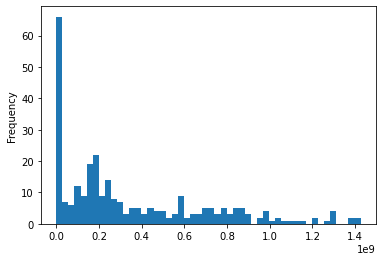

In [17]:
gdf['Total'].plot.hist(bins=50)

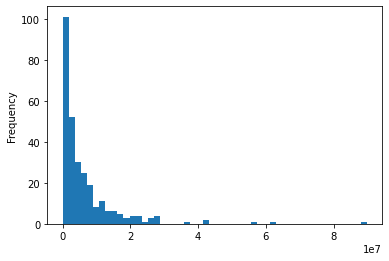

In [18]:
gdf['Householder under 25 years'].plot.hist(bins=50)

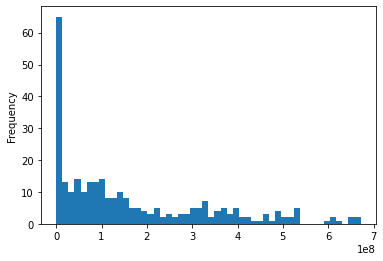

In [19]:
gdf['Householder 25 to 44 years'].plot.hist(bins=50)

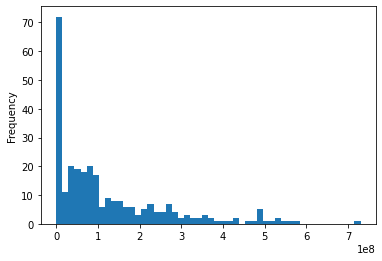

In [20]:
gdf['Householder 45 to 64 years'].plot.hist(bins=50)

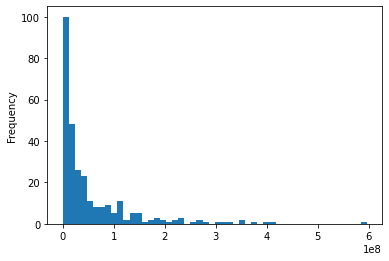

In [21]:
gdf['Householder 65 years and over'].plot.hist(bins=50)

In [22]:
list(gdf)

['geoid',
 'name',
 'Total',
 'Householder under 25 years',
 'Householder 25 to 44 years',
 'Householder 45 to 64 years',
 'Householder 65 years and over',
 'geometry']

## creating percent distributions

Once again, lets see how many people of each income category there are in contrast to the total population

In [23]:
# create a new column, and populate it with normalized data to get the percent of total value
gdf['Percent Householder under 25 years'] = gdf['Householder under 25 years']/gdf['Total']*100
gdf['Percent Householder 25 to 44 years'] = gdf['Householder 25 to 44 years']/gdf['Total']*100
gdf['Percent Householder 45 to 64 years'] = gdf['Householder 45 to 64 years']/gdf['Total']*100
gdf['Percent Householder 65 years and over'] = gdf['Householder 65 years and over']/gdf['Total']*100

In [24]:
gdf.sample(5)

,geoid,name,Total,Householder under 25 years,Householder 25 to 44 years,Householder 45 to 64 years,Householder 65 years and over,geometry,Percent Householder under 25 years,Percent Householder 25 to 44 years,Percent Householder 45 to 64 years,Percent Householder 65 years and over
148,14000US36061014602,"Census Tract 146.02, New York, NY",7.790362e+08,5963000.0,353337300.0,274124200.0,145611700.0,"MULTIPOLYGON (((-73.95367 40.77925, -73.95349 ...",0.765433,45.355697,35.187607,18.691262
46,14000US36061004500,"Census Tract 45, New York, NY",0.000000e+00,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-74.00142 40.71994, -74.00066 ...",NaN,NaN,NaN,NaN
172,14000US36061016500,"Census Tract 165, New York, NY",0.000000e+00,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-73.97859 40.78278, -73.97833 ...",NaN,NaN,NaN,NaN
139,14000US36061013800,"Census Tract 138, New York, NY",1.157341e+09,13415200.0,662803100.0,340148800.0,140974000.0,"MULTIPOLYGON (((-73.95680 40.77497, -73.95678 ...",1.159140,57.269469,29.390540,12.180851
104,14000US36061010400,"Census Tract 104, New York, NY",1.378024e+08,1416300.0,26749000.0,67526100.0,42111100.0,"MULTIPOLYGON (((-73.98043 40.75990, -73.97997 ...",1.027776,19.411128,49.002122,30.559047


In [25]:
gdf.sample(5)

,geoid,name,Total,Householder under 25 years,Householder 25 to 44 years,Householder 45 to 64 years,Householder 65 years and over,geometry,Percent Householder under 25 years,Percent Householder 25 to 44 years,Percent Householder 45 to 64 years,Percent Householder 65 years and over
207,14000US36061019900,"Census Tract 199, New York, NY",474175000.0,10374300.0,179421400.0,173156300.0,111223100.0,"MULTIPOLYGON (((-73.97488 40.81080, -73.96922 ...",2.187863,37.838646,36.517383,23.456129
228,14000US36061022102,"Census Tract 221.02, New York, NY",169963100.0,0.0,105816300.0,56806200.0,7340700.0,"MULTIPOLYGON (((-73.94801 40.81712, -73.94767 ...",0.000000,62.258396,33.422666,4.318996
132,14000US36061013100,"Census Tract 131, New York, NY",271700000.0,16276900.0,157320600.0,83571300.0,14531300.0,"MULTIPOLYGON (((-73.98565 40.76291, -73.98519 ...",5.990762,57.902319,30.758668,5.348289
131,14000US36061013000,"Census Tract 130, New York, NY",692282600.0,0.0,73500400.0,346234600.0,272547600.0,"MULTIPOLYGON (((-73.96753 40.77178, -73.96704 ...",0.000000,10.617109,50.013477,39.369414
4,14000US36061000500,"Census Tract 5, New York, NY",0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-74.03294 40.68778, -74.02628 ...",NaN,NaN,NaN,NaN


## Comparing overlap between communities

Finally, we will once again look at the general overlap of communities. This time, we will lay out every generation compared with the last generation. This can help us to understand what age groups occupy the most wealthy and poor districts of the city.

Text(0.5, 1.0, 'Percent Householder 65 years and over')

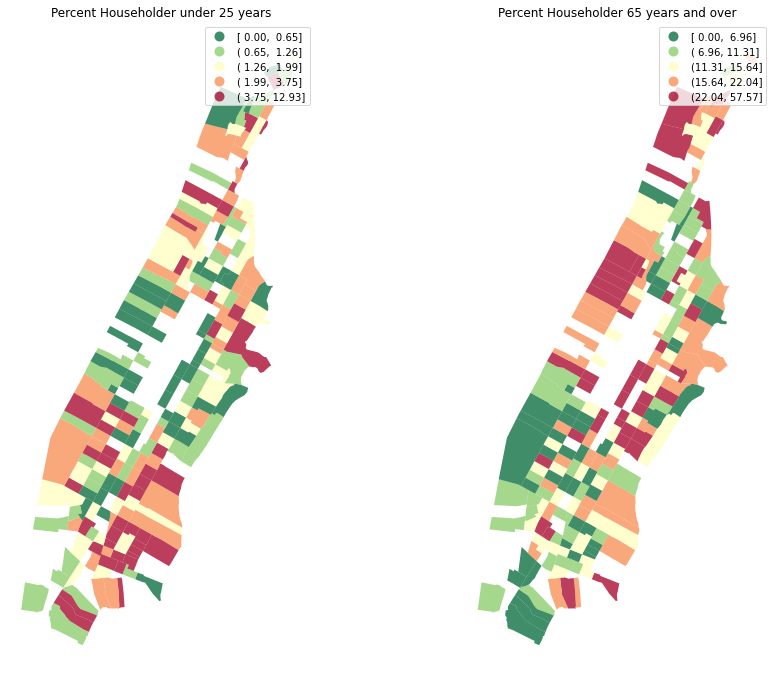

In [34]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# regular count map on the left
gdf.plot(column='Percent Householder under 25 years', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=["r", "k", "c"]) 
ax1.axis("off")
ax1.set_title("Percent Householder under 25 years")

# spatial lag map on the right
gdf.plot(column='Percent Householder 65 years and over', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Householder 65 years and over")

Text(0.5, 1.0, 'Percent Householder 65 years and over')

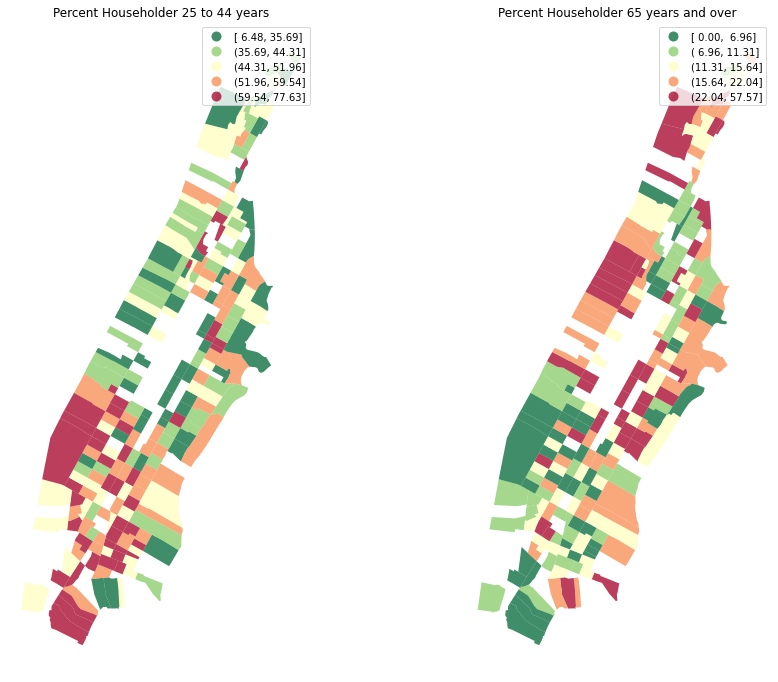

In [35]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs



# regular count map on the left
gdf.plot(column='Percent Householder 25 to 44 years', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=["r", "k", "c"]) 
ax1.axis("off")
ax1.set_title("Percent Householder 25 to 44 years")

# spatial lag map on the right
gdf.plot(column='Percent Householder 65 years and over', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Householder 65 years and over")

Text(0.5, 1.0, 'Percent Householder 65 years and over')

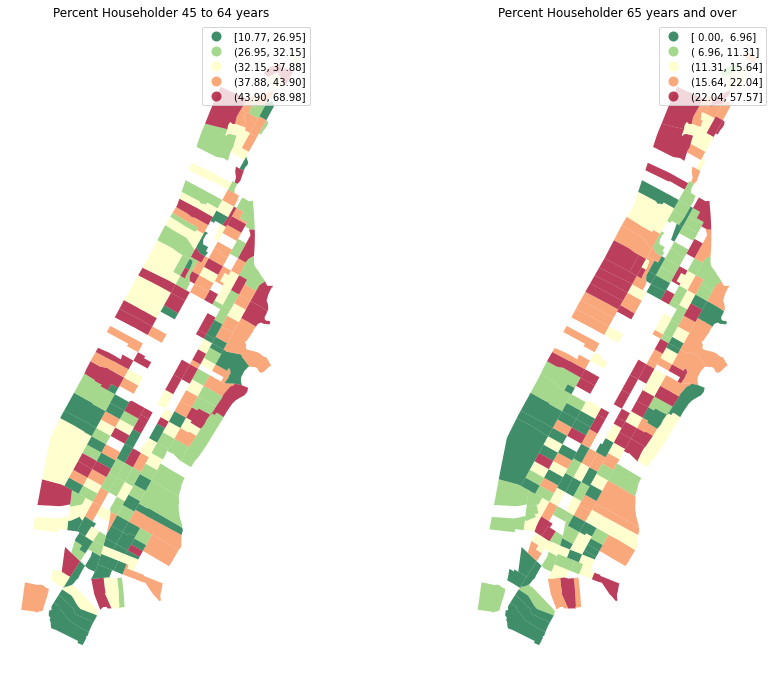

In [36]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# regular count map on the left
gdf.plot(column='Percent Householder 45 to 64 years', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=["r", "k", "c"]) 
ax1.axis("off")
ax1.set_title("Percent Householder 45 to 64 years")

# spatial lag map on the right
gdf.plot(column='Percent Householder 65 years and over', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Householder 65 years and over")

## conclusion

From here, we can see that the most wealthy districts of NY county (as determined from the previous assignment) are occupied largely by age groups 45-64, followed by 25-44. Suprisingly, people 65 or over and people 25 or under are fairly spread out across the board. That being said, both groups occupy more of the low incom bracket locations at a ration of about 7:3. This seems to check out, implying that there are few wealthy children and seniors amongst those who live in average or below average income brackets. 

With this understanding, we can hypothesize that a good portion of young adults and seniors occupy areas of high racial diversity. We can also hypothesize, that since the group of wealthy communities between 25 and 64 likely have children, young children and some young adults are occupying the wealthy districts. This can help us understand that the demographic of twitter users may be a large part low-average income young adults, and a large part high income community children. There are obviously going to be outliers, as can even be seen in this map, but this is a helpful start.

Lastly, I think it would be helpful to get an age demographic map out as well. This could be another step tangent to the Tweet scraping process.